In [50]:
# !pip install pyreadstat

In [51]:
# sav 파일 다운 경로: 
# https://drive.usercontent.google.com/download?id=1zaZjaxgOiBuUYOex0yu35R7L8EK5r-iQ&export=download

# 출판사 자료 깃허브: 
# https://github.com/youngwoos/Doit_Python/blob/main/Notebook/09.ipynb

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [53]:
raw_welfare = pd.read_spss('./data/Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()

In [54]:
welfare
welfare.shape
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [55]:
welfare = welfare.rename(
    columns={'h14_g3'   :   'sex',
             'h14_g4'   :   'birth',
             'h14_g10'   :   'marriage_type',
             'h14_g11'   :   'religion',
             'p1402_8aq1'   :   'income',
             'h14_eco9'   :   'code_job',
             'h14_reg7'   :   'code_region',
             }
)

In [56]:
#p229
welfare['sex'].dtypes

dtype('float64')

In [57]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [58]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

np.int64(0)

In [59]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

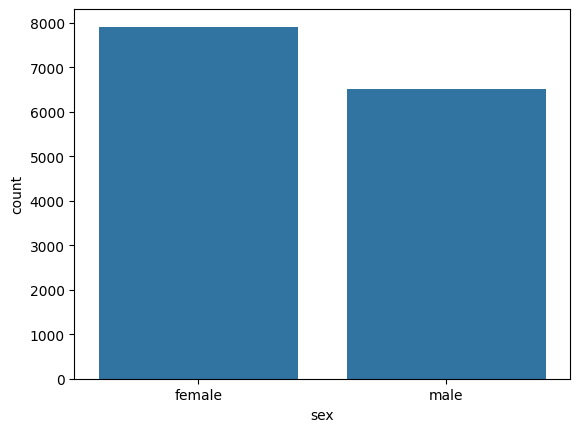

In [60]:
sns.countplot(data=welfare, x='sex')

In [61]:
welfare['income'].dtypes

dtype('float64')

In [62]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

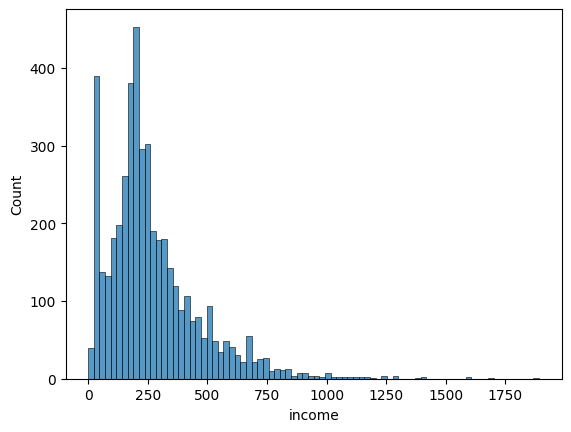

In [63]:
sns.histplot(data=welfare, x='income')

In [64]:
welfare['income'].isna().sum()

np.int64(9884)

In [65]:
#p234

sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

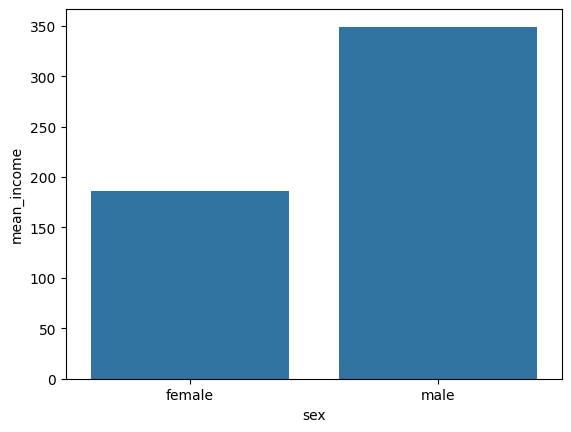

In [66]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [67]:
welfare['birth'].dtypes

dtype('float64')

In [68]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

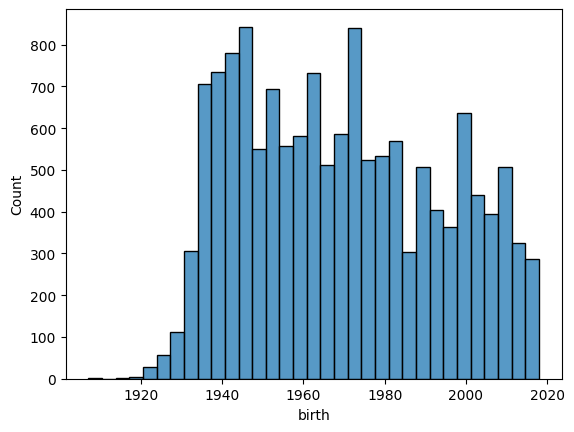

In [69]:
sns.histplot(data=welfare, x='birth')

In [70]:
welfare['birth'].isna().sum()

np.int64(0)

In [71]:
birth75 = welfare['birth'].quantile(.75) 
birth25 = welfare['birth'].quantile(.25)
birthiqr = birth75 - birth25 
birthiqr

np.float64(42.0)

In [72]:
#이상치가 있는지 보려고 극단값을 봤는데 max가 극단치 보다 작음

birthmax = birthiqr *1.5 + birth75
birthmax

np.float64(2053.0)

In [73]:
#이상치가 있는지 보려고 극소값을 봤는데 min가 극소값 보다 큼

birthmin = birth25 - birthiqr *1.5 
birthmin

np.float64(1885.0)

In [74]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])
welfare['birth'].isna().sum()

np.int64(0)

In [75]:
#p238

welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

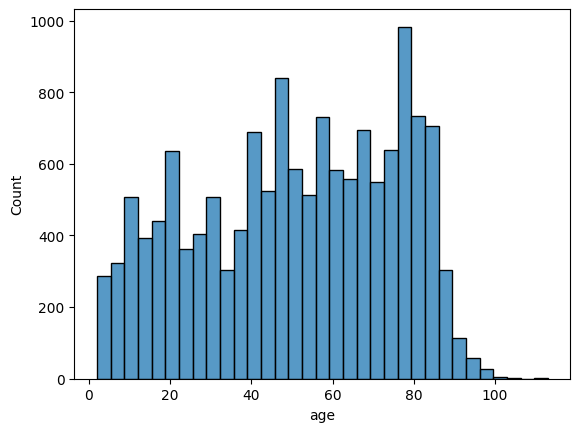

In [76]:
sns.histplot(data=welfare, x='age')

In [77]:
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

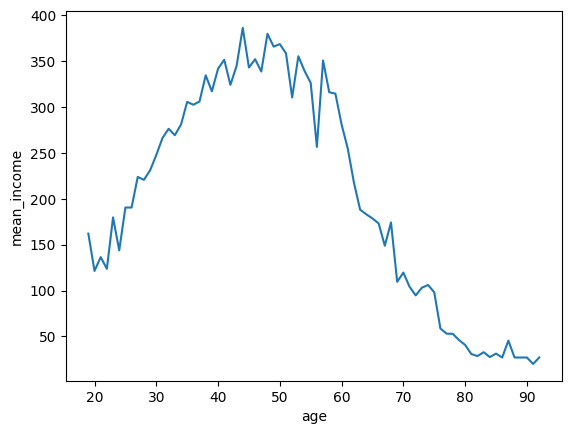

In [78]:
sns.lineplot(data=age_income, x='age', y='mean_income')

#p240 연령대에 따른 월급차이

In [79]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [80]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old'))
                        )
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

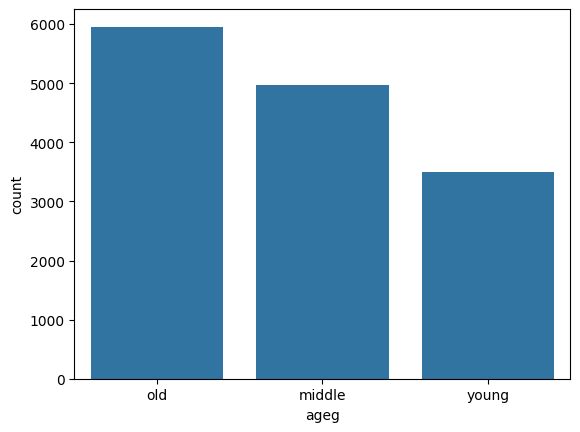

In [81]:
sns.countplot(data=welfare, x='ageg')

##p248 연령대별 월급 차이 분석

In [82]:
ageg_income = welfare.dropna(subset= ['income']).groupby('ageg', as_index= False).agg(mean_income = ('income', 'mean'))

In [83]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

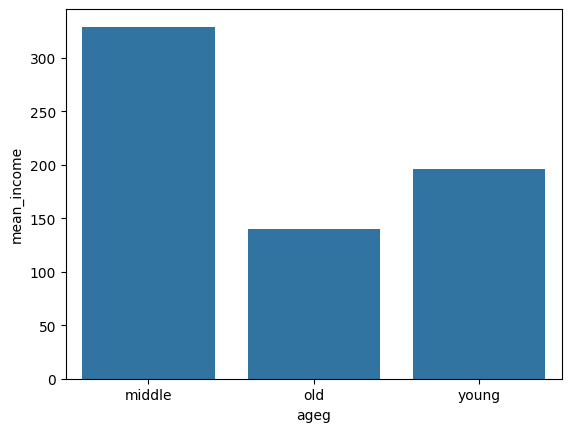

In [84]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

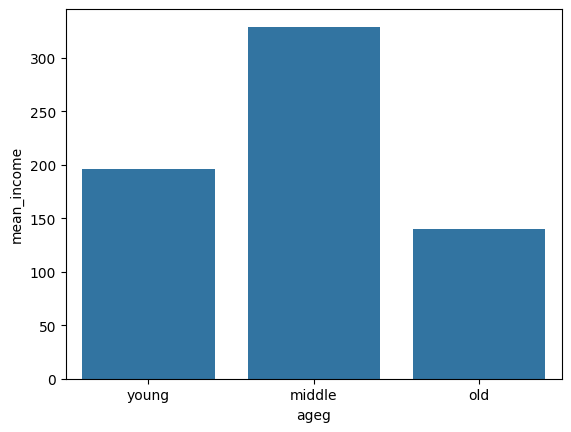

In [85]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order= ['young', 'middle', 'old'])

In [86]:
sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

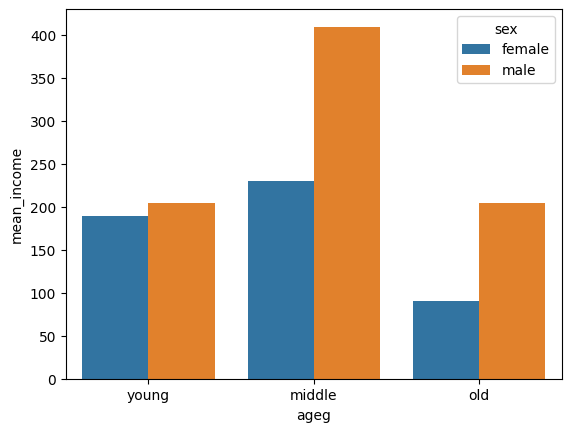

In [87]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex', order=['young', 'middle', 'old'])

In [88]:
#p246
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

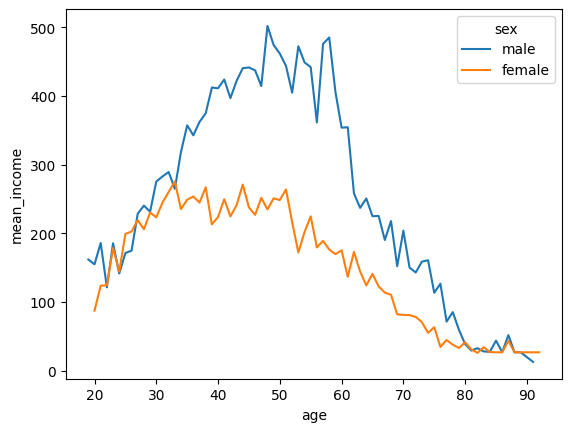

In [91]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

#p248 직업별 월급차이

In [93]:
welfare['code_job'].dtypes

dtype('float64')

In [94]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [95]:
list_job = pd.read_excel('./data/Koweps_Codebook_2019.xlsx', sheet_name= '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [96]:
list_job.shape

(156, 2)

In [97]:
welfare = welfare.merge(list_job, how='left', on='code_job')

In [98]:
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [ ]:
#p250 직업별 월급차이 분석하기 